<a href="https://colab.research.google.com/github/mrudulchaudhari/machine-learning/blob/main/LinearRegression/MultipleLinearRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Multiple Regression on Electricity cost prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("electricity_cost_dataset.csv")
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


In [13]:
df.isnull().sum() # no null values

,0
site area,0
structure type,0
water consumption,0
recycling rate,0
utilisation rate,0
air qality index,0
issue reolution time,0
resident count,0
electricity cost,0


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

In [18]:
df['structure type'] = le.fit_transform(df['structure type'])

In [19]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,2,2519.0,69,52,188,1,72,1420.0
1,4272,2,2324.0,50,76,165,65,261,3298.0
2,3592,2,2701.0,20,94,198,39,117,3115.0
3,966,3,1000.0,13,60,74,3,35,1575.0
4,4926,3,5990.0,23,65,32,57,185,4301.0


In [22]:
to_be_standardized = ["site area", "water consumption", "recycling rate", "utilisation rate", "air qality index", "issue reolution time", "resident count"]

scaler = StandardScaler()

for col in to_be_standardized:
  df[col] = scaler.fit_transform(df[[col]])

In [23]:
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,-1.081036,2,-0.469663,0.828120,-0.628535,1.526098,-1.716667,-0.125827,1420.0
1,1.171099,2,-0.563590,0.017158,0.546096,1.129625,1.386684,1.626269,3298.0
2,0.645188,2,-0.381998,-1.263308,1.427069,1.698477,0.125948,0.291338,3115.0
3,-1.385755,3,-1.201332,-1.562083,-0.236992,-0.439026,-1.619687,-0.468830,1575.0
4,1.676901,3,1.202240,-1.135261,0.007723,-1.163019,0.998765,0.921722,4301.0


In [24]:
X = df.drop("electricity cost", axis = 1)
y = df["electricity cost"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score

In [30]:
print("R2 score", r2_score(y_test, y_pred))

R2 score 0.8117434318171048


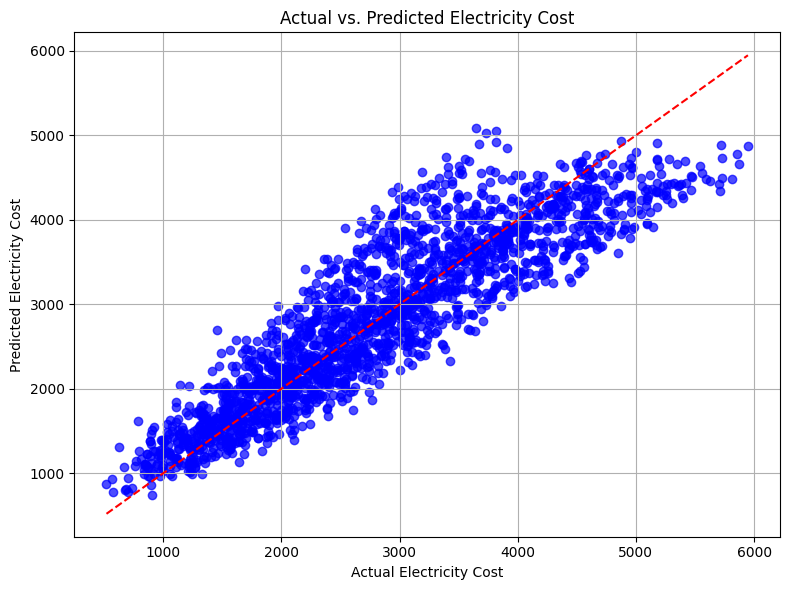

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Electricity Cost")
plt.ylabel("Predicted Electricity Cost")
plt.title("Actual vs. Predicted Electricity Cost")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.grid(True)
plt.tight_layout()
plt.show()